In [2]:
import pandas as pd

In [3]:
# importing clear data for analysis

In [4]:
# establishing a new column calculating the percentage from the three available scores and grading using the average scores

In [6]:
df = pd.read_csv(r"/content/StudentsPerformance.csv")

print(df.to_string())

     gender race/ethnicity parental level of education         lunch test preparation course  math score  reading score  writing score
0    female        group B           bachelor's degree      standard                    none          72             72             74
1    female        group C                some college      standard               completed          69             90             88
2    female        group B             master's degree      standard                    none          90             95             93
3      male        group A          associate's degree  free/reduced                    none          47             57             44
4      male        group C                some college      standard                    none          76             78             75
5    female        group B          associate's degree      standard                    none          71             83             78
6    female        group B                some college 

In [8]:
df["Percentage"]=(df["math score"]+df["reading score"]+df["writing score"])/3
print(df["Percentage"])

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: Percentage, Length: 1000, dtype: float64


In [9]:
df['Percentage'] = (df['math score']+df['reading score']+df['writing score'])/3
print(df["Percentage"])


def Grade(Percentage):
    if (Percentage >= 95):return 'O'
    if (Percentage >= 81):return 'A'
    if (Percentage >= 71):return 'B'
    if (Percentage >= 61):return 'C'
    if (Percentage >= 51):return 'D'
    if (Percentage >= 41):return 'E'
    else: return 'F'

df["grade"] = df.apply(lambda x : Grade(x["Percentage"]),axis=1)

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: Percentage, Length: 1000, dtype: float64


In [10]:
print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  \
0                      none          72             72        

In [11]:
# using Seaborn for analysis

In [12]:
import seaborn as sns
import numpy as np

<ipython-input-28-0fe6da503903>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='gender', y='Percentage', data=df, palette='plasma')


<Axes: xlabel='gender', ylabel='Percentage'>

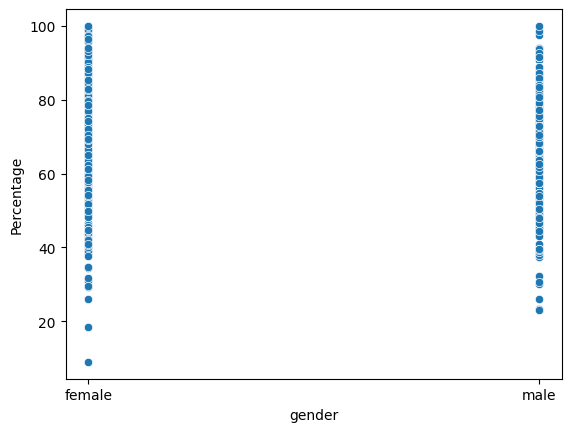

In [28]:
import seaborn as sns
import numpy as np

sns.scatterplot(x='gender', y='Percentage', data=df, palette='plasma')


In [29]:
df['gender'].value_counts()

,count
gender,
female,518
male,482


In [30]:
import matplotlib.pyplot as plot

In [16]:
lunchCount = df['lunch'].value_counts()
print(lunchCount)

lunch
standard        645
free/reduced    355
Name: count, dtype: int64


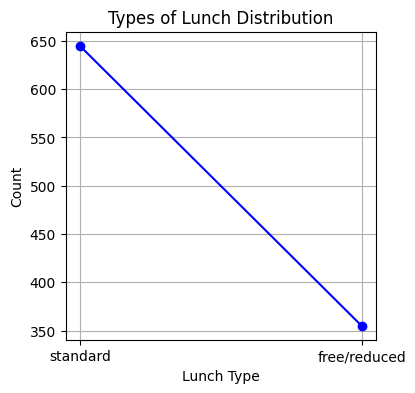

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.plot(lunchCount.index, lunchCount.values, marker='o', color='b')  # Line graph
plt.title("Types of Lunch Distribution")
plt.xlabel("Lunch Type")
plt.ylabel("Count")
plt.grid(True)
plt.savefig(r"/content/sample_data/lunchdistribution.png")
plt.show()


In [19]:
# Below countplot illustares the grade secured by female and male

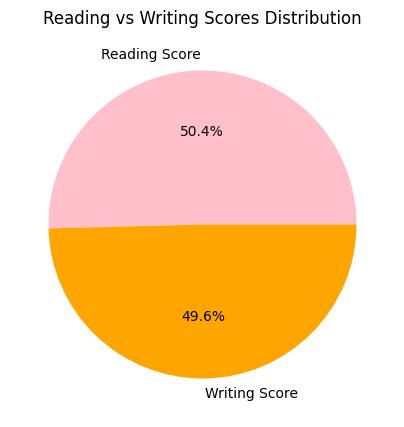

In [41]:
import matplotlib.pyplot as plt

# Summing up the scores for proportion representation
scores = [df['reading score'].sum(), df['writing score'].sum()]
labels = ['Reading Score', 'Writing Score']

plt.figure(figsize=(5, 5))
plt.pie(scores, labels=labels, autopct='%1.1f%%', colors=['pink', 'orange'])

# Add title
plt.title('Reading vs Writing Scores Distribution')

# Save the plot as a PNG file
plt.savefig(r"/content/sample_data/readingvswriting.png")

# Display the plot
plt.show()


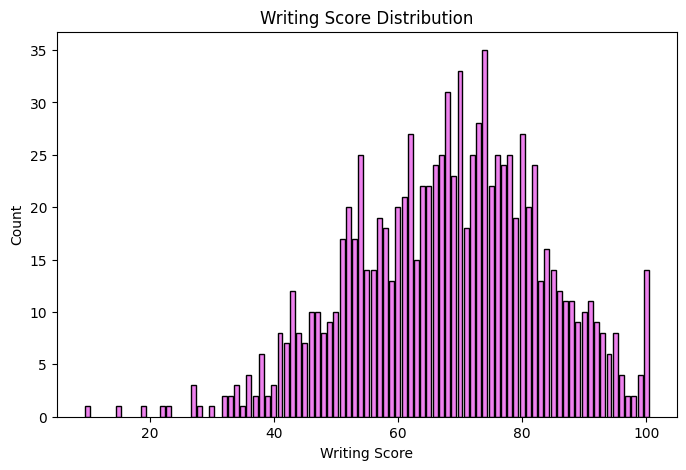

In [42]:
import matplotlib.pyplot as plt

# Count occurrences of each writing score
writing_score_counts = df['writing score'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(writing_score_counts.index, writing_score_counts.values, color='violet', edgecolor='black')

# Add labels and title
plt.xlabel('Writing Score')
plt.ylabel('Count')
plt.title("Writing Score Distribution")

# Save the plot as a PNG file
plt.savefig(r"/content/sample_data/writingscorenumbers.png")

# Display the plot
plt.show()


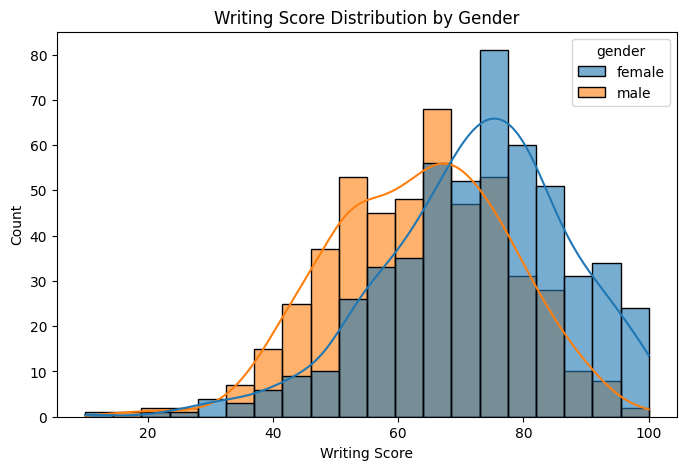

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df, x='writing score', hue='gender', bins=20, kde=True, alpha=0.6)

# Add labels and title
plt.xlabel('Writing Score')
plt.ylabel('Count')
plt.title("Writing Score Distribution by Gender")

# Save the plot as a PNG file
plt.savefig(r"/content/sample_data/writingscorebygender.png")

# Display the plot
plt.show()


<ipython-input-38-567844ee2dff>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df['Percentage'], kde = False, color ='green', bins = 25)


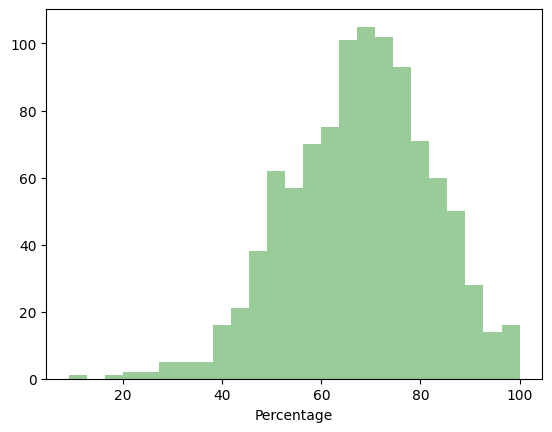

In [38]:
ax=sns.distplot(df['Percentage'], kde = False, color ='green', bins = 25)
fig=ax.get_figure()
fig.savefig(r"/content/sample_data\Distribution_percentage.png")

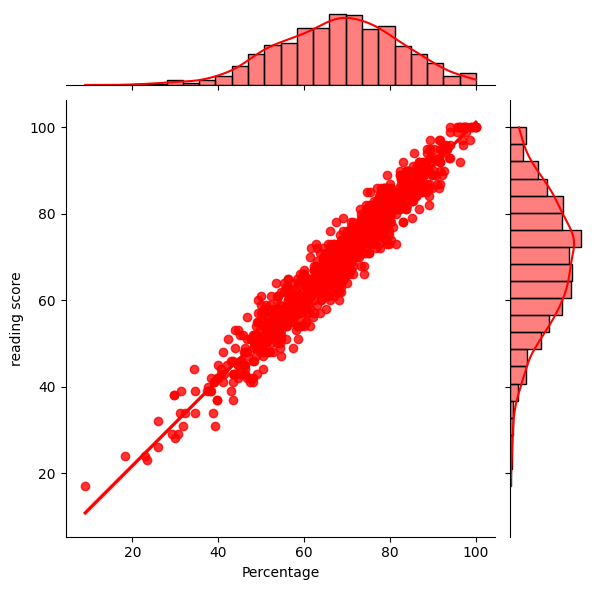

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with regression line
ax = sns.jointplot(x='Percentage', y='reading score', data=df, kind='reg', color='red')

# Save the plot as a PNG file
plt.savefig(r"/content/sample_data/Scatter_Reg_Plot.png")

# Display the plot
plt.show()


<ipython-input-40-c5038a2845f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='gender', y='reading score', data=df, inner='quartile', palette='coolwarm')


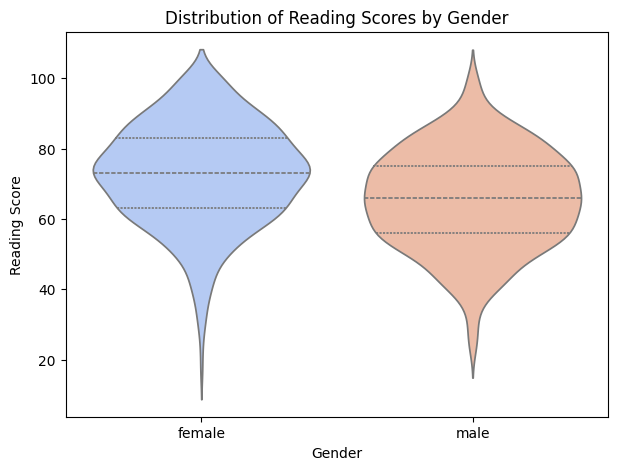

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.violinplot(x='gender', y='reading score', data=df, inner='quartile', palette='coolwarm')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Reading Score')
plt.title("Distribution of Reading Scores by Gender")

# Show the plot
plt.show()
